# TEXT SUMMARIZATION

* Automatic text summarization is the task of producing a concise and fluent summary while preserving key information content and overall meaning

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving 1_GIVviyN9Q0cqObcy-q-juQ.png to 1_GIVviyN9Q0cqObcy-q-juQ (2).png


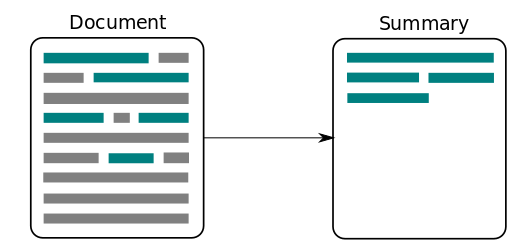

In [ ]:
Image('1_GIVviyN9Q0cqObcy-q-juQ.png', width=700)

* There are broadly two different approaches that are used for text summarization:

1. Extractive Summarization
2. Abstractive Summarization

In [ ]:
uploaded = files.upload()

Saving 11.PNG to 11 (2).PNG


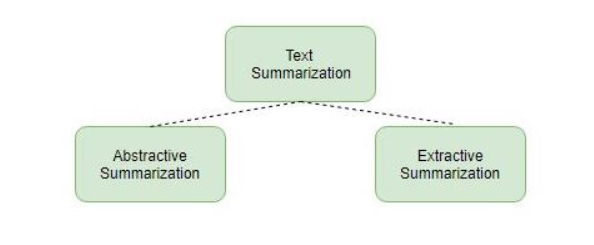

In [ ]:
Image('11.PNG', width=700)

# Extractive Summarization

The name gives away what this approach does. We identify the important sentences or phrases from the original text and extract only those from the text. Those extracted sentences would be our summary. The below diagram illustrates extractive summarization:

In [ ]:
uploaded = files.upload()

Saving 112.PNG to 112 (2).PNG


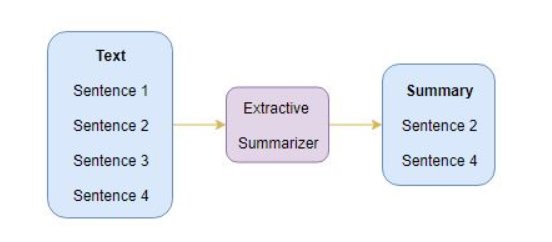

In [ ]:
Image('112.PNG', width=700)

# Extractive Summarization

# Importing the Libraries

In [ ]:
import nltk
import urllib
import bs4 as bs
import re
from nltk.corpus import stopwords
nltk.download('punkt')
import pandas as pd
import heapq
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Download the stop words package

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Steps followed:

1.Collect data through web scraping

2.Cleanup data

3.Algorithm NLTK to build tokens (word or sentences)

4.word frequency

5.weighted frequency for each words

6.Calculate sentence score with each word frequency.

7.select top 10 sentences for summary

8.Word Cloud

# 1.Collect data through web scraping

In [ ]:
from urllib import request
from bs4 import BeautifulSoup as bs
import re
import nltk
url="https://en.wikipedia.org/wiki/Machine_learning"
allParagraphContent = ""
htmlDoc=request.urlopen(url)
soupObject=bs(htmlDoc,'html.parser')
paragraphContents=soupObject.find_all('p')
print(paragraphContents)

[<p><b>Machine learning</b> (<b>ML</b>) is the study of computer algorithms that improve automatically through experience.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup> It is seen as a subset of <a href="/wiki/Artificial_intelligence" title="Artificial intelligence">artificial intelligence</a>. Machine learning algorithms build a <a href="/wiki/Mathematical_model" title="Mathematical model">mathematical model</a> based on sample data, known as "<a class="mw-redirect" href="/wiki/Training_data" title="Training data">training data</a>", in order to make predictions or decisions without being explicitly programmed to do so.<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup> Machine learning algorithms are used in a wide variety of applications, such as <a href="/wiki/Email_filtering" title="Email filtering">email filtering</a> and <a href="/wiki/Computer_vision" 

In [ ]:
for paragraphContent in paragraphContents:
  allParagraphContent +=paragraphContent.text
print(allParagraphContent)

Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1][2] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[3] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop  conventional algorithms to perform the needed tasks.
Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[5][6] In its application across business problems, machine learning is also 

##2.Preprocessing the data

In [ ]:
allParagraphContent_cleanerData=re.sub(r'\[[0-9]*\]',' ', allParagraphContent)#Removing numbers
allParagraphContent_cleanedData=re.sub(r'\s+',' ', allParagraphContent_cleanerData)#Removing spaces
#print(allParagraphContent_cleanedData)
#allParagraphContent_cleanedData=re.sub(r'[^a-zA-Z]',' ', allParagraphContent_cleanedData)
allParagraphContent_cleanedData=re.sub(r'\s+',' ', allParagraphContent_cleanedData)
#print(allParagraphContent_cleanedData)

# 3.Algorithm NLTK to build tokens (word or sentences)

In [ ]:
sentences_tokens=nltk.sent_tokenize(allParagraphContent_cleanedData)
words_token=nltk.word_tokenize(allParagraphContent_cleanedData)

# 4.word frequency

In [ ]:
#Removing the stop word and calculate frequency

stopwords=nltk.corpus.stopwords.words('english')
word_frequencies={}
for word in words_token:
  if word not in stopwords:
    if word not in word_frequencies.keys():
      word_frequencies[word] = 1
    else:
      word_frequencies[word] +=1
print(word_frequencies)


{'Machine': 13, 'learning': 154, '(': 56, 'ML': 1, ')': 56, 'study': 5, 'computer': 12, 'algorithms': 43, 'improve': 5, 'automatically': 1, 'experience': 4, '.': 260, 'It': 11, 'seen': 2, 'subset': 2, 'artificial': 17, 'intelligence': 6, 'build': 3, 'mathematical': 8, 'model': 32, 'based': 5, 'sample': 3, 'data': 75, ',': 337, 'known': 11, '``': 23, 'training': 46, "''": 22, 'order': 5, 'make': 5, 'predictions': 8, 'decisions': 4, 'without': 7, 'explicitly': 3, 'programmed': 3, 'used': 27, 'wide': 1, 'variety': 4, 'applications': 4, 'email': 3, 'filtering': 2, 'vision': 4, 'difficult': 2, 'infeasible': 2, 'develop': 2, 'conventional': 1, 'perform': 10, 'needed': 4, 'tasks': 14, 'closely': 3, 'related': 9, 'computational': 4, 'statistics': 10, 'focuses': 3, 'making': 3, 'using': 11, 'computers': 5, 'The': 26, 'optimization': 5, 'delivers': 1, 'methods': 19, 'theory': 9, 'application': 4, 'domains': 3, 'field': 18, 'machine': 74, 'Data': 3, 'mining': 11, 'focusing': 1, 'exploratory': 1, 

# 5.weighted frequency for each words

In [ ]:
#calculate weighted frequency
maximum_frequency_word=max(word_frequencies.values())

for word in word_frequencies.keys():
  word_frequencies[word]=(word_frequencies[word]/maximum_frequency_word)

print(word_frequencies)

{'Machine': 0.03857566765578635, 'learning': 0.456973293768546, '(': 0.1661721068249258, 'ML': 0.002967359050445104, ')': 0.1661721068249258, 'study': 0.01483679525222552, 'computer': 0.03560830860534125, 'algorithms': 0.12759643916913946, 'improve': 0.01483679525222552, 'automatically': 0.002967359050445104, 'experience': 0.011869436201780416, '.': 0.771513353115727, 'It': 0.032640949554896145, 'seen': 0.005934718100890208, 'subset': 0.005934718100890208, 'artificial': 0.050445103857566766, 'intelligence': 0.017804154302670624, 'build': 0.008902077151335312, 'mathematical': 0.02373887240356083, 'model': 0.09495548961424333, 'based': 0.01483679525222552, 'sample': 0.008902077151335312, 'data': 0.22255192878338279, ',': 1.0, 'known': 0.032640949554896145, '``': 0.06824925816023739, 'training': 0.13649851632047477, "''": 0.06528189910979229, 'order': 0.01483679525222552, 'make': 0.01483679525222552, 'predictions': 0.02373887240356083, 'decisions': 0.011869436201780416, 'without': 0.02077

# 6.Score each sentence depending on the words it contains and the frequency table



In [ ]:
#Calculate sentence score with each word frequency
sentences_scores={}
for sentence in sentences_tokens:
  for word in nltk.word_tokenize(sentence.lower()):
    if word in word_frequencies.keys():
      if(len(sentence.split(' ')))<30:
        if sentence not in sentences_scores.keys():
          sentences_scores[sentence]=word_frequencies[word]
        else:
          sentences_scores[sentence] +=word_frequencies[word]

print(sentences_scores)

{'Machine learning (ML) is the study of computer algorithms that improve automatically through experience.': 1.9881305637982194, 'It is seen as a subset of artificial intelligence.': 0.8516320474777448, 'Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.': 4.578635014836796, 'Machine learning is closely related to computational statistics, which focuses on making predictions using computers.': 2.6142433234421363, 'The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.': 2.661721068249258, 'Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.': 2.8724035608308602, 'In its application across business problems, machine learning is also referred to as predictive analytics.': 2.56973293768546, 'Machine learning involves computers d

# 7.select top 10 sentences for summary

In [ ]:
summary_machine_learning=heapq.nlargest(10,sentences_scores,key=sentences_scores.get)

In [ ]:
summary_machine_learning

['In weakly supervised learning, the training labels are noisy, limited, or imprecise; however, these labels are often cheaper to obtain, resulting in larger effective training sets.',
 'Artificial neural networks have been used on a variety of tasks, including computer vision, speech recognition, machine translation, social network filtering, playing board and video games and medical diagnosis.',
 'This line, too, was continued outside the AI/CS field, as "connectionism", by researchers from other disciplines including Hopfield, Rumelhart and Hinton.',
 'Rule-based machine learning is a general term for any machine learning method that identifies, learns, or evolves "rules" to store, manipulate or apply knowledge.',
 'Usually, when training a machine learning model, one needs to collect a large, representative sample of data from a training set.',
 'Each connection, like the synapses in a biological brain, can transmit information, a "signal", from one artificial neuron to another.',


## 8.Word cloud

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [ ]:
for val in summary_machine_learning: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='yellow', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

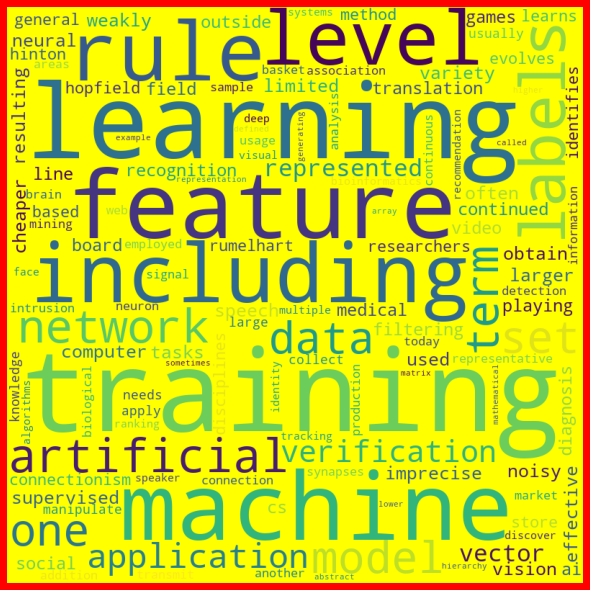

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = 'red',frameon='bool') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# lets bring in various others algorithms and compare the summaries generated by each of them.

# Text summarization using Sumy

* Simple library and command line utility for extracting summary from HTML pages or plain texts. The package also contains simple evaluation framework for text summaries. Implemented summarization methods:

1. Luhn - heurestic method
2. Latent Semantic Analysis, LSA
   1. Latent Semantic Analysis is an robust Algebric-Statistical method which extracts hidden semantic structures of words and sentences i.e. it extracts the features that cannot be directly mentioned. These features are essential to data , but are not original features of the dataset. It is an unsupervised approach along with the usage of Natural Language Processing(NLP).
3. LexRank - Unsupervised approach inspired by algorithms PageRank.


For more info, please visit https://pypi.org/project/sumy/

In [ ]:
!pip install sumy

In [ ]:
# load packages 
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [ ]:
allParagraphContent_cleanedData

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as 

In [ ]:
type(allParagraphContent_cleanedData)

str

In [ ]:
# for strings
parser = PlaintextParser.from_string(allParagraphContent_cleanedData,Tokenizer("english"))

In [ ]:
parser

#using Lexrank


*  Unsupervised approach to text summarization based on graph-based centrality scoring of sentences.


*   The main idea is that sentences "recommend" other similar sentences to the reader. Thus, if one sentence is very similar to many others, it will likely be a sentence of greater importance.




In [ ]:
#standalone package
!pip install lexrank

In [ ]:
from sumy.summarizers.lex_rank import LexRankSummarizer
summarizer = LexRankSummarizer()
lex_summary = summarizer(parser.document,10)

In [ ]:
for sentence in lex_summary:
  print(sentence)

Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.
Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Work on symbolic/knowledge-based learning did continue within AI, leading to inductive logic programming, but the more statistical line of research was now outside the field of AI proper, in pattern recognition and information retrieval.
Data mining uses many machine learning methods, but with different goals; on the other hand, machine learning also employs data mining methods as "unsupervised learning" or as a preprocessing step to improve learner accuracy.
The data is known as training data, and consists of a set of training examples.
Through iterative optimization of an objective f

# Using Luhn



*  Based on frequency of most important words



In [ ]:
from sumy.summarizers.luhn import LuhnSummarizer
luhn_summarizer = LuhnSummarizer()
luhn_summary = luhn_summarizer(parser.document,10)

In [ ]:
for sentence in luhn_summary:
  print(sentence)

Machine learning approaches are traditionally divided into three broad categories, depending on the nature of the "signal" or "feedback" available to the learning system: Other approaches have been developed which don't fit neatly into this three-fold categorisation, and sometimes more than one is used by the same machine learning system.
Tom M. Mitchell provided a widely quoted, more formal definition of the algorithms studied in the machine learning field: "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E." This definition of the tasks in which machine learning is concerned offers a fundamentally operational definition rather than defining the field in cognitive terms.
Machine learning and data mining often employ the same methods and overlap significantly, but while machine learning focuses on prediction, based on known properties learne

# using LSA



*   based on term frequency techniques with singular value decomposition to summarize texts

* Benefits of LSA
1. Reduce the dimensionality of the original text-based dataset.
2. It helps us understand what each topic is encoding.
3. Analyze word association in text corpus.
4. Find relations between terms.
5. LSA has been used to assist in performing prior art searches for patents.

for more info. please refer https://iq.opengenus.org/latent-semantic-analysis-for-text-summarization/


In [ ]:
from sumy.summarizers.lsa import LsaSummarizer
lsa_summarizer = LsaSummarizer()
lsa_summary = lsa_summarizer(parser.document,10)

In [ ]:
for sentence in lsa_summary:
  print(sentence)

This line, too, was continued outside the AI/CS field, as "connectionism", by researchers from other disciplines including Hopfield, Rumelhart and Hinton.
Self-learning as machine learning paradigm was introduced in 1982 along with a neural network capable of self-learning named Crossbar Adaptive Array (CAA).
In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.
Gordon Plotkin and Ehud Shapiro laid the initial theoretical foundation for inductive machine learning in a logical setting.
Shapiro built their first implementation (Model Inference System) in 1981: a Prolog program that inductively inferred logic programs from positive and negative examples.
Regression analysis encompasses a large variety of statistical methods to estimate the relationship between input variables and their associated features.
The latter is often extended by regularization (mathematics) methods to mitigate

# Alternative method using stopwords


In [ ]:
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
summarizer_lsa2 = LsaSummarizer()
summarizer_lsa2 = LsaSummarizer(Stemmer("english"))
summarizer_lsa2.stop_words = get_stop_words("english")

In [ ]:
alt_summary = summarizer_lsa2(parser.document,10)

In [ ]:
for sentence in alt_summary:
  print(sentence)

The term machine learning was coined in 1959 by Arthur Samuel, an American IBMer and pioneer in the field of computer gaming and artificial intelligence.
In 1981 a report was given on using teaching strategies so that a neural network learns to recognize 40 characters (26 letters, 10 digits, and 4 special symbols) from a computer terminal.
The self-learning algorithm updates a memory matrix W =||w(a,s)|| such that in each iteration executes the following machine learning routine: It is a system with only one input, situation s, and only one output, action (or behavior) a.
Typically, the anomalous items represent an issue such as bank fraud, a structural defect, medical problems or errors in a text.
The defining characteristic of a rule-based machine learning algorithm is the identification and utilization of a set of relational rules that collectively represent the knowledge captured by the system.
This is in contrast to other machine learning algorithms that commonly identify a singul

# Text summarization using Spacy

* Features
1. Non-destructive tokenization
2. Named entity recognition
3. Support for 59+ languages
4. 46 statistical models for 16 languages
5. Pretrained word vectors
6. State-of-the-art speed
7. Easy deep learning integration
8. Part-of-speech tagging
9. Labelled dependency parsing
10. Syntax-driven sentence segmentation
11. Built in visualizers for syntax and NER
12. Convenient string-to-hash mapping
13. Export to numpy data arrays
14. Efficient binary serialization
15. Easy model packaging and deployment
16. Robust, rigorously evaluated accuracy


For more info, please visit https://spacy.io/

In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [ ]:
allParagraphContent_cleanedData

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as 

# Text Preprocessing + Tokenization

In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
stopwords

['beyond',
 'any',
 'ours',
 'otherwise',
 'seem',
 'around',
 'could',
 'about',
 'more',
 'next',
 'also',
 'everywhere',
 'nothing',
 'the',
 'do',
 'thereafter',
 'became',
 'his',
 'used',
 '’s',
 'other',
 'not',
 'hundred',
 'same',
 'whereas',
 'where',
 'yours',
 'part',
 'eleven',
 'then',
 'it',
 'various',
 'after',
 'its',
 '‘d',
 'nine',
 'serious',
 'less',
 'bottom',
 'first',
 'throughout',
 'them',
 'we',
 'done',
 'her',
 'via',
 'and',
 'he',
 'noone',
 'can',
 'really',
 'she',
 'these',
 'from',
 'to',
 'n‘t',
 're',
 'least',
 'seeming',
 'seemed',
 "n't",
 'another',
 'since',
 'behind',
 'being',
 'forty',
 'unless',
 'sometime',
 'whence',
 'themselves',
 'anything',
 'along',
 'been',
 'during',
 'this',
 'every',
 'further',
 'if',
 'go',
 'above',
 'am',
 'how',
 'last',
 'our',
 'third',
 'however',
 'that',
 'under',
 'your',
 'whereupon',
 'either',
 'was',
 'an',
 '’m',
 'hereby',
 'whither',
 'except',
 'me',
 'together',
 'just',
 'between',
 'does',


In [ ]:
len(stopwords)

326

In [ ]:
nlp = spacy.load('en')

In [ ]:
paragraph_wise = nlp(allParagraphContent_cleanedData)

In [ ]:
for token in paragraph_wise:
  print(token.text)

Streaming output truncated to the last 5000 lines.
output
,
also
known
as
a
supervisory
signal
.
In
the
mathematical
model
,
each
training
example
is
represented
by
an
array
or
vector
,
sometimes
called
a
feature
vector
,
and
the
training
data
is
represented
by
a
matrix
.
Through
iterative
optimization
of
an
objective
function
,
supervised
learning
algorithms
learn
a
function
that
can
be
used
to
predict
the
output
associated
with
new
inputs
.
An
optimal
function
will
allow
the
algorithm
to
correctly
determine
the
output
for
inputs
that
were
not
a
part
of
the
training
data
.
An
algorithm
that
improves
the
accuracy
of
its
outputs
or
predictions
over
time
is
said
to
have
learned
to
perform
that
task
.
Types
of
supervised
learning
algorithms
include
Active
learning
,
classification
and
regression
.
Classification
algorithms
are
used
when
the
outputs
are
restricted
to
a
limited
set
of
values
,
and
regression
algorithms
are
used
when
the
outputs
may
have
any
numerical
value
within
a
range
.


# word frequency table
# dictionary of words and their counts
# using non stop words

In [ ]:
word_frequencies = {}
for word in paragraph_wise:
  if word.text not in stopwords:
    if word.text not in word_frequencies.keys():
      word_frequencies[word.text] = 1
    else:
      word_frequencies[word.text] +=1

In [ ]:
word_frequencies

{'Machine': 0.03857566765578635,
 'learning': 0.47774480712166173,
 '(': 0.16023738872403562,
 'ML': 0.002967359050445104,
 ')': 0.1632047477744807,
 'study': 0.01483679525222552,
 'computer': 0.03560830860534125,
 'algorithms': 0.12759643916913946,
 'improve': 0.01483679525222552,
 'automatically': 0.002967359050445104,
 'experience': 0.011869436201780416,
 '.': 0.771513353115727,
 'It': 0.032640949554896145,
 'seen': 0.005934718100890208,
 'subset': 0.005934718100890208,
 'artificial': 0.050445103857566766,
 'intelligence': 0.017804154302670624,
 'build': 0.008902077151335312,
 'mathematical': 0.02373887240356083,
 'model': 0.09495548961424333,
 'based': 0.03857566765578635,
 'sample': 0.008902077151335312,
 'data': 0.22551928783382788,
 ',': 1.0,
 'known': 0.032640949554896145,
 '"': 0.13353115727002968,
 'training': 0.13649851632047477,
 'order': 0.01483679525222552,
 'predictions': 0.02373887240356083,
 'decisions': 0.011869436201780416,
 'explicitly': 0.008902077151335312,
 'prog

# maximum frequency
1. find the weighted frequency
2. each word over the most occuring word
3. Long sentence over short sentence

In [ ]:
maximum_frequency = max(word_frequencies.values())
maximum_frequency

337

In [ ]:
for word in word_frequencies.keys():
  word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [ ]:
word_frequencies

{'Machine': 0.03857566765578635,
 'learning': 0.47774480712166173,
 '(': 0.16023738872403562,
 'ML': 0.002967359050445104,
 ')': 0.1632047477744807,
 'study': 0.01483679525222552,
 'computer': 0.03560830860534125,
 'algorithms': 0.12759643916913946,
 'improve': 0.01483679525222552,
 'automatically': 0.002967359050445104,
 'experience': 0.011869436201780416,
 '.': 0.771513353115727,
 'It': 0.032640949554896145,
 'seen': 0.005934718100890208,
 'subset': 0.005934718100890208,
 'artificial': 0.050445103857566766,
 'intelligence': 0.017804154302670624,
 'build': 0.008902077151335312,
 'mathematical': 0.02373887240356083,
 'model': 0.09495548961424333,
 'based': 0.03857566765578635,
 'sample': 0.008902077151335312,
 'data': 0.22551928783382788,
 ',': 1.0,
 'known': 0.032640949554896145,
 '"': 0.13353115727002968,
 'training': 0.13649851632047477,
 'order': 0.01483679525222552,
 'predictions': 0.02373887240356083,
 'decisions': 0.011869436201780416,
 'explicitly': 0.008902077151335312,
 'prog

# Sentence tokenization

1. scoring every sentence based on number of words
2. non stop words in our word frequency table

In [ ]:
#Calculate sentence score with each word frequency
sentences_scores={}
for sentence in sentences_tokens:
  for word in nltk.word_tokenize(sentence.lower()):
    if word in word_frequencies.keys():
      if(len(sentence.split(' ')))<30:
        if sentence not in sentences_scores.keys():
          sentences_scores[sentence]=word_frequencies[word]
        else:
          sentences_scores[sentence] +=word_frequencies[word]

In [ ]:
sentences_scores

{':25 Machine learning, reorganized as a separate field, started to flourish in the 1990s.': 3.5578635014836797,
 ':488 By 1980, expert systems had come to dominate AI, and statistics was out of favor.': 2.863501483679525,
 ':488 However, an increasing emphasis on the logical, knowledge-based approach caused a rift between AI and machine learning.': 3.5222551928783385,
 ':708–710; 755 Neural networks research had been abandoned by AI and computer science around the same time.': 0.9465875370919882,
 'A central application of unsupervised learning is in the field of density estimation in statistics, such as finding the probability density function.': 2.4451038575667656,
 'A core objective of a learner is to generalize from its experience.': 0.8041543026706232,
 'A machine learning system trained on current customers only may not be able to predict the needs of new customer groups that are not represented in the training data.': 1.9910979228486647,
 'A popular heuristic method for sparse 

In [ ]:
spacy_summary=heapq.nlargest(10,sentences_scores,key=sentences_scores.get)
spacy_summary

['In weakly supervised learning, the training labels are noisy, limited, or imprecise; however, these labels are often cheaper to obtain, resulting in larger effective training sets.',
 'Artificial neural networks have been used on a variety of tasks, including computer vision, speech recognition, machine translation, social network filtering, playing board and video games and medical diagnosis.',
 'This line, too, was continued outside the AI/CS field, as "connectionism", by researchers from other disciplines including Hopfield, Rumelhart and Hinton.',
 'Rule-based machine learning is a general term for any machine learning method that identifies, learns, or evolves "rules" to store, manipulate or apply knowledge.',
 'Usually, when training a machine learning model, one needs to collect a large, representative sample of data from a training set.',
 'In addition to market basket analysis, association rules are employed today in application areas including Web usage mining, intrusion de

# Gensim Summarization


* This module provides functions for summarizing texts. Summarizing is based on ranks of text sentences using a variation of the TextRank algorithm

* This module automatically summarizes the given text, by extracting one or more important sentences from the text. In a similar way, it can also extract keywords. This tutorial will teach you to use this summarization module via some examples. First, we will try a small example, then we will try two larger ones, and then we will review the performance of the summarizer in terms of speed.

This summarizer is based on the , from an “TextRank” algorithm by Mihalcea et al. This algorithm was later improved upon by Barrios et al., by introducing something called a “BM25 ranking function”.

For more info, Please visit https://radimrehurek.com/gensim/auto_examples/tutorials/run_summarization.html

In [ ]:
import gensim
!pip install requests
import requests

In [ ]:
gensim_summary = gensim.summarization.summarize(allParagraphContent_cleanedData)
gensim_summary

'Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.\nMachine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.\nThe study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.\nFor simple tasks assigned to computers, it is possible to program algorithms telling the machine how to execute all steps required to solve the problem at hand; on the computer\'s part, no learning is needed.\nThe discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.\nThey attempted to approach the problem with various symbolic methods, as well as what were then termed

# centroid_word_embedding_summarization

In [ ]:
!pip install git+https://github.com/lambdaofgod/text-summarizer
import nltk
import text_summarizer

  Cloning https://github.com/lambdaofgod/text-summarizer to /tmp/pip-req-build-zc2dus2p
  Running command git clone -q https://github.com/lambdaofgod/text-summarizer /tmp/pip-req-build-zc2dus2p
  Created wheel for text-summarizer: filename=text_summarizer-0.1-cp36-none-any.whl size=18947 sha256=045d918684d61935b30a48af2b843f4aae87a1a76ba1f0cb1370c2fceb59483d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5lufdhv/wheels/4d/f9/45/2ca8320ba0c7c2b195f29896a7ca565d703f354774ea8fe707
Successfully built text-summarizer


In [ ]:
# prepare nltk data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# we'll need embedding model from gensim for summarizer

embedding_model = text_summarizer.centroid_word_embeddings.load_gensim_embedding_model('glove-wiki-gigaword-50')

centroid_word_embedding_summarizer = text_summarizer.CentroidWordEmbeddingsSummarizer(embedding_model, preprocess_type='nltk')

centroid_word_embedding_summary = centroid_word_embedding_summarizer.summarize(allParagraphContent_cleanedData)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
centroid_word_embedding_summary

'Probabilistic reasoning was also employed, especially in automated medical diagnosis.\nMuch of the confusion between these two research communities (which do often have separate conferences and separate journals, ECML PKDD being a major exception) comes from the basic assumptions they work with: in machine learning, performance is usually evaluated with respect to the ability to reproduce known knowledge, while in knowledge discovery and data mining (KDD) the key task is the discovery of previously unknown knowledge.\nFeature learning can be either supervised or unsupervised.\nIn 2018, a self-driving car from Uber failed to detect a pedestrian, who was killed after a collision.'

# Pytext rank

PyTextRank is a Python implementation of TextRank as a spaCy pipeline extension, used to:

1. extract the top-ranked phrases from text documents
2. infer links from unstructured text into structured data
3. run extractive summarization of text documents

For more info, Please refer https://pypi.org/project/pytextrank/

In [ ]:
!pip install pytextrank
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install -r requirements.txt
!python -m spacy download en_core_web_sm

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


# load spaCy with a language model for English ...

In [ ]:
import spacy
import pytextrank

In [ ]:
allParagraphContent_cleanedData

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as 

In [ ]:
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank into the spaCy pipeline...

In [ ]:
# add PyTextRank to the spaCy pipeline
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

In [ ]:
doc = nlp(allParagraphContent_cleanedData)

# a list of top-ranked phrases in the document

In [ ]:
# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

0.0981     3  machine learning algorithms
[Machine learning algorithms, machine learning algorithms, machine learning algorithms]
0.0938     4  machine learning models
[machine learning models, machine learning models, a machine learning model, a machine learning model]
0.0926    33  machine learning
[Machine learning, Machine learning, machine learning, machine learning, Machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, Machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, machine learning, 25 Machine learning, that machine learning]
0.0908     2  machine learning systems
[machine learning systems, Machine learning systems]
0.0

# Construct a list of the sentence boundaries with a phrase vector (initialized to empty set) for each...

In [ ]:
sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
sent_bounds

[[0, 17, set()],
 [17, 27, set()],
 [27, 61, set()],
 [61, 97, set()],
 [97, 114, set()],
 [114, 133, set()],
 [133, 151, set()],
 [151, 168, set()],
 [168, 186, set()],
 [186, 201, set()],
 [201, 241, set()],
 [241, 260, set()],
 [260, 290, set()],
 [290, 312, set()],
 [312, 335, set()],
 [335, 351, set()],
 [351, 358, set()],
 [358, 381, set()],
 [381, 442, set()],
 [442, 453, set()],
 [453, 475, set()],
 [475, 502, set()],
 [502, 531, set()],
 [531, 550, set()],
 [550, 587, set()],
 [587, 648, set()],
 [648, 674, set()],
 [674, 721, set()],
 [721, 737, set()],
 [737, 759, set()],
 [759, 804, set()],
 [804, 816, set()],
 [816, 818, set()],
 [818, 840, set()],
 [840, 855, set()],
 [855, 875, set()],
 [875, 917, set()],
 [917, 937, set()],
 [937, 968, set()],
 [968, 981, set()],
 [981, 999, set()],
 [999, 1017, set()],
 [1017, 1043, set()],
 [1043, 1062, set()],
 [1062, 1068, set()],
 [1068, 1094, set()],
 [1094, 1141, set()],
 [1141, 1154, set()],
 [1154, 1194, set()],
 [1194, 1255, s

# Iterate through the top-ranked phrases, added them to the phrase vector for each sentence

In [ ]:
limit_phrases = 10

phrase_id = 0
unit_vector = []

for p in doc._.phrases:
    print(phrase_id, p.text, p.rank)
    
    unit_vector.append(p.rank)
    
    for chunk in p.chunks:
        print(" ", chunk.start, chunk.end)
        
        for sent_start, sent_end, sent_vector in sent_bounds:
            if chunk.start >= sent_start and chunk.start <= sent_end:
                print(" ", sent_start, chunk.start, chunk.end, sent_end)
                sent_vector.add(phrase_id)
                break

    phrase_id += 1

    if phrase_id == limit_phrases:
        break

0 machine learning algorithms 0.098108645545407
  61 64
  27 61 64 61
  1878 1881
  1875 1878 1881 1909
  6951 6954
  6945 6951 6954 6958
1 machine learning models 0.09382605241659561
  5492 5495
  5490 5492 5495 5508
  5589 5592
  5577 5589 5592 5618
  5512 5516
  5508 5512 5516 5533
  5572 5576
  5563 5572 5576 5577
2 machine learning 0.09264457012497908
  0 2
  0 0 2 17
  97 99
  61 97 99 97
  130 132
  114 130 132 133
  158 160
  151 158 160 168
  168 170
  151 168 170 168
  293 295
  290 293 295 312
  472 474
  453 472 474 475
  656 658
  648 656 658 674
  726 728
  721 726 728 737
  837 839
  818 837 839 840
  1087 1089
  1068 1087 1089 1094
  1110 1112
  1094 1110 1112 1141
  1172 1174
  1154 1172 1174 1194
  1231 1233
  1194 1231 1233 1255
  1417 1419
  1392 1417 1419 1429
  1429 1431
  1392 1429 1431 1429
  1458 1460
  1429 1458 1460 1465
  1474 1476
  1465 1474 1476 1494
  1547 1549
  1541 1547 1549 1561
  2539 2541
  2533 2539 2541 2563
  2610 2612
  2609 2610 2612 2627
  44

# Let's take a look at the results..

In [ ]:
sent_bounds

[[0, 17, {2}],
 [17, 27, set()],
 [27, 61, {0}],
 [61, 97, {2}],
 [97, 114, set()],
 [114, 133, {2}],
 [133, 151, set()],
 [151, 168, {2}],
 [168, 186, set()],
 [186, 201, set()],
 [201, 241, set()],
 [241, 260, set()],
 [260, 290, set()],
 [290, 312, {2}],
 [312, 335, set()],
 [335, 351, set()],
 [351, 358, set()],
 [358, 381, {5}],
 [381, 442, set()],
 [442, 453, set()],
 [453, 475, {2}],
 [475, 502, set()],
 [502, 531, set()],
 [531, 550, set()],
 [550, 587, set()],
 [587, 648, set()],
 [648, 674, {2}],
 [674, 721, set()],
 [721, 737, {2}],
 [737, 759, set()],
 [759, 804, set()],
 [804, 816, set()],
 [816, 818, set()],
 [818, 840, {2}],
 [840, 855, set()],
 [855, 875, set()],
 [875, 917, set()],
 [917, 937, set()],
 [937, 968, set()],
 [968, 981, set()],
 [981, 999, {2}],
 [999, 1017, set()],
 [1017, 1043, set()],
 [1043, 1062, {2}],
 [1062, 1068, set()],
 [1068, 1094, {2}],
 [1094, 1141, {2}],
 [1141, 1154, set()],
 [1154, 1194, {2, 6}],
 [1194, 1255, {2}],
 [1255, 1258, set()],
 [

In [ ]:
for sent in doc.sents:
    print(sent)

Machine learning (ML) is the study of computer algorithms that improve automatically through experience.
It is seen as a subset of artificial intelligence.
Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.
Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Machine learning is closely related to computational statistics, which focuses on making predictions using computers.
The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.
In its application across business problems, machine learning is also referred to as p

# We also construct a unit_vector for all of the phrases, up to the limit requested

In [ ]:
unit_vector

[0.098108645545407,
 0.09382605241659561,
 0.09264457012497908,
 0.09078173369342357,
 0.09020441882306286,
 0.0889341199678684,
 0.08837493173228952,
 0.08819149068163755,
 0.08615279152119919,
 0.08023914397869664]

In [ ]:
sum_ranks = sum(unit_vector)
unit_vector = [ rank/sum_ranks for rank in unit_vector ]

unit_vector

[0.1093183821893004,
 0.1045464668314434,
 0.1032299902662354,
 0.10115430912876942,
 0.10051103118633316,
 0.09909559001930054,
 0.0984725098318926,
 0.09826810910071444,
 0.09599647144074229,
 0.08940714000526845]

# Iterate through each sentence, calculating its euclidean distance from the unit vector

In [ ]:
from math import sqrt

sent_rank = {}
sent_id = 0

for sent_start, sent_end, sent_vector in sent_bounds:
    print(sent_vector)
    sum_sq = 0.0
    
    for phrase_id in range(len(unit_vector)):
        print(phrase_id, unit_vector[phrase_id])
        
        if phrase_id not in sent_vector:
            sum_sq += unit_vector[phrase_id]**2.0

    sent_rank[sent_id] = sqrt(sum_sq)
    sent_id += 1

print(sent_rank)

{2}
0 0.1093183821893004
1 0.1045464668314434
2 0.1032299902662354
3 0.10115430912876942
4 0.10051103118633316
5 0.09909559001930054
6 0.0984725098318926
7 0.09826810910071444
8 0.09599647144074229
9 0.08940714000526845
set()
0 0.1093183821893004
1 0.1045464668314434
2 0.1032299902662354
3 0.10115430912876942
4 0.10051103118633316
5 0.09909559001930054
6 0.0984725098318926
7 0.09826810910071444
8 0.09599647144074229
9 0.08940714000526845
{0}
0 0.1093183821893004
1 0.1045464668314434
2 0.1032299902662354
3 0.10115430912876942
4 0.10051103118633316
5 0.09909559001930054
6 0.0984725098318926
7 0.09826810910071444
8 0.09599647144074229
9 0.08940714000526845
{2}
0 0.1093183821893004
1 0.1045464668314434
2 0.1032299902662354
3 0.10115430912876942
4 0.10051103118633316
5 0.09909559001930054
6 0.0984725098318926
7 0.09826810910071444
8 0.09599647144074229
9 0.08940714000526845
set()
0 0.1093183821893004
1 0.1045464668314434
2 0.1032299902662354
3 0.10115430912876942
4 0.10051103118633316
5 0.0

# Sort the sentence indexes in descending order

In [ ]:
from operator import itemgetter

sorted(sent_rank.items(), key=itemgetter(1)) 

[(48, 0.2826670311468617),
 (77, 0.28338978671069376),
 (2, 0.2971588933480776),
 (271, 0.2971588933480776),
 (219, 0.2988711308463934),
 (220, 0.2988711308463934),
 (222, 0.2988711308463934),
 (223, 0.2988711308463934),
 (0, 0.2993283910523241),
 (3, 0.2993283910523241),
 (5, 0.2993283910523241),
 (7, 0.2993283910523241),
 (13, 0.2993283910523241),
 (20, 0.2993283910523241),
 (26, 0.2993283910523241),
 (28, 0.2993283910523241),
 (33, 0.2993283910523241),
 (40, 0.2993283910523241),
 (43, 0.2993283910523241),
 (45, 0.2993283910523241),
 (46, 0.2993283910523241),
 (49, 0.2993283910523241),
 (55, 0.2993283910523241),
 (56, 0.2993283910523241),
 (57, 0.2993283910523241),
 (60, 0.2993283910523241),
 (101, 0.2993283910523241),
 (103, 0.2993283910523241),
 (175, 0.2993283910523241),
 (217, 0.2993283910523241),
 (226, 0.2993283910523241),
 (232, 0.2993283910523241),
 (233, 0.2993283910523241),
 (240, 0.2993283910523241),
 (246, 0.2993283910523241),
 (247, 0.2993283910523241),
 (261, 0.29932839

# Extract the sentences with the lowest distance, up to the limite requested

In [ ]:
limit_sentences = 10

sent_text = {}
sent_id = 0

for sent in doc.sents:
    sent_text[sent_id] = sent.text
    sent_id += 1

num_sent = 0

for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
    print(sent_id, sent_text[sent_id])
    num_sent += 1
    
    if num_sent == limit_sentences:
        break

48 Data mining uses many machine learning methods, but with different goals; on the other hand, machine learning also employs data mining methods as "unsupervised learning" or as a preprocessing step to improve learner accuracy.
77 The types of machine learning algorithms differ in their approach, the type of data they input and output, and the type of task or problem that they are intended to solve.
2 Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.
271 Software suites containing a variety of machine learning algorithms include the following:
219 Usually, machine learning models require a lot of data in order for them to perform well.
220 Usually, when training a machine learning model, one needs to collect a large, representative sample of data from a training set.
222 Overfitting is something to watch out for when training a machine learning m

# Using Summa

* TextRank implementation for text summarization and keyword extraction in Python 3, with optimizations on the similarity function.

* Features
1. Text summarization
2. Keyword extraction.

For more info, please refer https://pypi.org/project/summa/

In [ ]:
!pip install summa

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for summa: filename=summa-1.2.0-cp36-none-any.whl size=54411 sha256=8d2cc92430d6917e74a18ca8e012bad3f7bd15a5bd84051ae8397843af6aa424
  Stored in directory: /root/.cache/pip/wheels/6a/09/68/e2f2861c01d86407c3fa5220826ed7eed2abaa56b001be5970
Successfully built summa


# Define length of the summary as a proportion of the text

In [ ]:
from summa.summarizer import summarize
summarize(allParagraphContent_cleanedData, ratio=0.2)

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience.\nMachine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.\nMachine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.\nThe study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.\nMachine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so.\nFor simple tasks assigned to computers, it is possible to program algorithms telling the machine how to execute all steps required to solve the problem at hand; on the computer\'s part, no learning is needed.\nThe discipline of machine le

# Define length of the summary by aproximate number of words

In [ ]:
summa_summary = summarize(allParagraphContent_cleanedData, words=400, split=True)

In [ ]:
summa_summary

['Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.',
 'Machine learning and data mining often employ the same methods and overlap significantly, but while machine learning focuses on prediction, based on known properties learned from the training data, data mining focuses on the discovery of (previously) unknown properties in the data (this is the analysis step of knowledge discovery in databases).',
 'The difference between the two fields arises from the goal of generalization: while optimization algorithms can minimize the loss on a training set, machine learning is concerned with minimizing the loss on unseen samples.',
 'Generalization in this context is the ability of a learning machine to perform accurately on new, unseen examples/tasks after having experienced a learning data set.',
 'The types of machine learning algorithms differ in thei

# Till now we have gone through various summarizations. The below are the listed algorithms done.

1. Used NLTK and summarized.---(summary_machine_learning)
2. Used SUMY and summarized:
   1. Using LexRank.---(lex_summary)
   2. Using Luhn.---(luhn_summary)
   3. Using LSA.---(lsa_summary)
   4. Alternative method using stopwords.---(alt_summary)
   
3. Used SPACY and summarized.---(spacy_summary)
4. Used Genism and summarized.---(gensim_summary)
5. CENTROID WORD EMBEDDING summarization.---(centroid_word_embedding_summary)
6. Used PyText rank.
7. Used SUMMA and summarized.---(summa_summary)



# Lets now move on to comparison and which one has given the most relevant summary by using the metrics ROGUE and BLEU.

Bleu measures precision: how much the words (and/or n-grams) in the machine generated summaries appeared in the human reference summaries.

Rouge measures recall: how much the words (and/or n-grams) in the human reference summaries appeared in the machine generated summaries.

BTW, there's something called brevity penalty, which is quite important and has already been added to standard Bleu implementations. It penalizes system results which are shorter than the general length of a reference (read more about it here). This complements the n-gram metric behavior which in effect penalizes longer than reference results, since the denominator grows the longer the system result is.

You could also implement something similar for Rouge, but this time penalizing system results which are longer than the general reference length, which would otherwise enable them to obtain artificially higher Rouge scores (since the longer the result, the higher the chance you would hit some word appearing in the references). In Rouge we divide by the length of the human references, so we would need an additional penalty for longer system results which could artificially raise their Rouge score.

Finally, you could use the F1 measure to make the metrics work together: F1 = 2 * (Bleu * Rouge) / (Bleu + Rouge)

ROUGE recall:

enter image description here

ROUGE precision:

enter image description here

(The original ROUGE implementation from the paper that introduced ROUGE {1} may perform a few more things such as stemming.)

The ROUGE-n precision and recall are easy to interpret

The difference between the ROUGE-n precision and BLEU is that BLEU introduces a brevity penalty term, and also compute the n-gram match for several size of n-grams (unlike the ROUGE-n, where there is only one chosen n-gram size). 

# Also developed a front end to check some of this summarizers.